In [22]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
import numpy as np

2 2
1 2
0 2


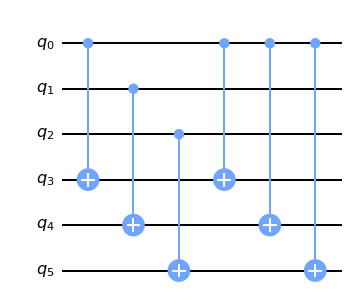

In [23]:
n=6
p=int(n/2)
bs='111'
so1 = QuantumCircuit(n)

for i in range(p):
    so1.cx(i,i+p)
    
k=0
for i in range(p-1,-1,-1):
    if bs[i]=='1':
        m=p
        for j in range(p-1,-1,-1):
            print(j,i)
            if bs[j]=='1':
                so1.cx(k,m)
            m+=1
        break
    k+=1


so1.draw('mpl')

2 2
1 2
0 2


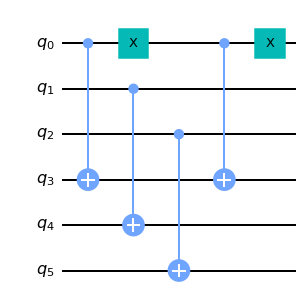

In [24]:
n=6
p=int(n/2)
bs='001'
so2 = QuantumCircuit(n)

for i in range(p):
    so2.cx(i,i+p)
    
k=0
for i in range(p-1,-1,-1):
    if bs[i]=='1':
        so2.x(k)
        m=p
        for j in range(p-1,-1,-1):
            print(j,i)
            if bs[j]=='1':
                so2.cx(k,m)
            m+=1
        so2.x(k)
        break
    k+=1


so2.draw('mpl')

/tmp/ipykernel_138/2863472995.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  simon=simon+so2


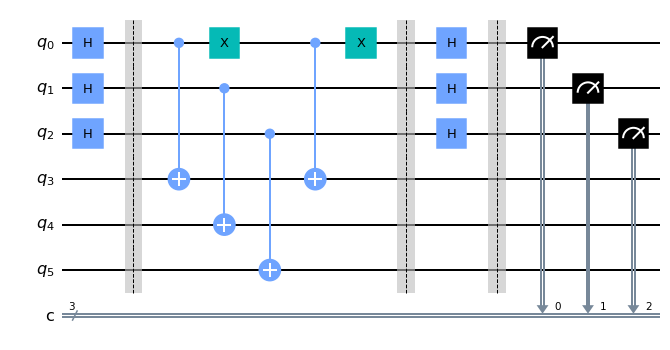

In [25]:
simon = QuantumCircuit(n,p)

# Apply H-gates
for qubit in range(p):
    simon.h(qubit)



simon.barrier()
# Add oracle
simon=simon+so2
simon.barrier()
# Repeat H-gates
for qubit in range(p):
    simon.h(qubit)
simon.barrier()

# Measure
for i in range(p):
    simon.measure(i, i)

# Display circuit
simon.draw('mpl')

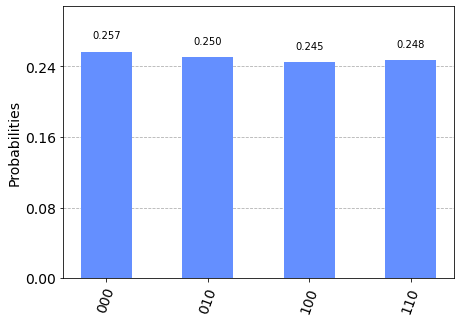

In [26]:
# use local simulator
simulator = BasicAer.get_backend('qasm_simulator')
shots = 5000
noisy_results = execute(simon, backend=simulator, shots=shots).result()
noisy_counts = noisy_results.get_counts()

plot_histogram(noisy_counts)